In [5]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Supprimer les warning
import warnings
warnings.filterwarnings("ignore")

Importer et lire les données

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Import les données
df = pd.read_csv('/content/drive/MyDrive/Boosso_2024/ML/ML 2/Car_dataset.csv')

In [9]:
# Afficher des données
df.head()

,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Transmission,Age,Selling_Price
0,27000,5.59,Petrol,Dealer,Manual,6,3.35
1,43000,9.54,Diesel,Dealer,Manual,7,4.75
2,6900,9.85,Petrol,Dealer,Manual,3,7.25
3,5200,4.15,Petrol,Dealer,Manual,9,2.85
4,42450,6.87,Diesel,Dealer,Manual,6,4.60


In [10]:
# Dimension des données
df.shape

(5861, 7)

In [11]:
# infos des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861 entries, 0 to 5860
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kms_Driven     5861 non-null   int64  
 1   Present_Price  5861 non-null   float64
 2   Fuel_Type      5861 non-null   object 
 3   Seller_Type    5861 non-null   object 
 4   Transmission   5861 non-null   object 
 5   Age            5861 non-null   int64  
 6   Selling_Price  5861 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 320.6+ KB


Exploraton et préparation des données

Selection des variables catégorielles et quantitatives

In [12]:
# selection les variables catégorielles
cat_data = df.select_dtypes(include = 'object')
cat_data.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [13]:
# selection des variables quantitatives
quant_data = df.select_dtypes(include = 'number')
quant_data.head()

,Kms_Driven,Present_Price,Age,Selling_Price
0,27000,5.59,6,3.35
1,43000,9.54,7,4.75
2,6900,9.85,3,7.25
3,5200,4.15,9,2.85
4,42450,6.87,6,4.60


Exploration des variables catégorielles

In [14]:
# décrire les variables catégorielles
cat_data.describe()

,Fuel_Type,Seller_Type,Transmission
count,5861,5861,5861
unique,3,2,2
top,Petrol,Dealer,Automatic
freq,2743,3765,3007


In [15]:
# Diagrammes en barre des variables catégorielles
for col in cat_data.columns:
    vc_count = cat_data[col].value_counts()
    fig = px.bar(x = vc_count.index, y = vc_count.values, color =vc_count.index)
    fig.show()

Exploration des variables quantitatives

In [16]:
# décrire les variables quantitatives
quant_data.describe()

,Kms_Driven,Present_Price,Age,Selling_Price
count,5861.000000,5861.000000,5861.000000,5861.000000
mean,75209.206108,16.869948,8.562532,10.196217
std,39198.500980,9.659501,3.099993,5.874282
min,500.000000,0.320000,2.000000,0.100000
25%,53822.000000,10.552438,6.000000,6.401756
50%,71822.000000,15.375776,8.000000,9.049277
75%,87820.000000,19.229938,10.000000,11.873727
max,538824.000000,102.661886,22.000000,41.903189


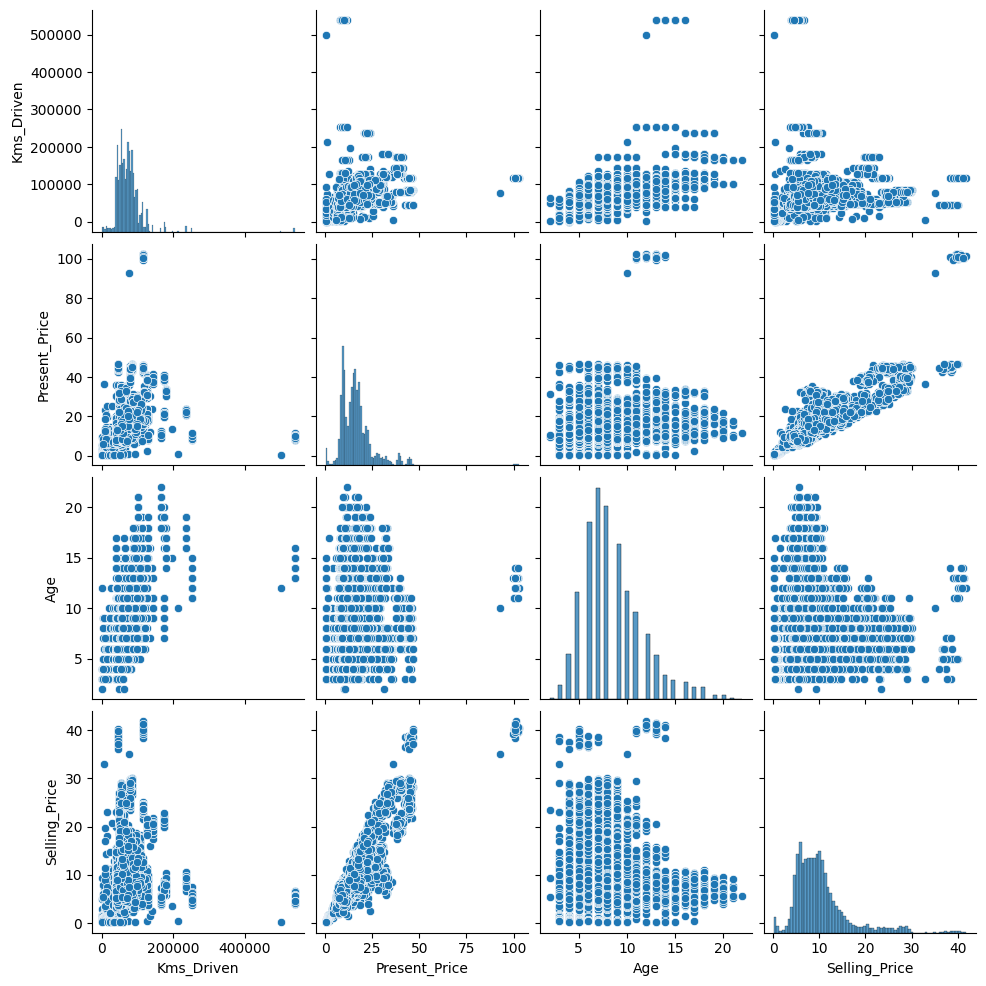

In [17]:
# pairplot des variables quantitatives
sns.pairplot(quant_data)

<Axes: >

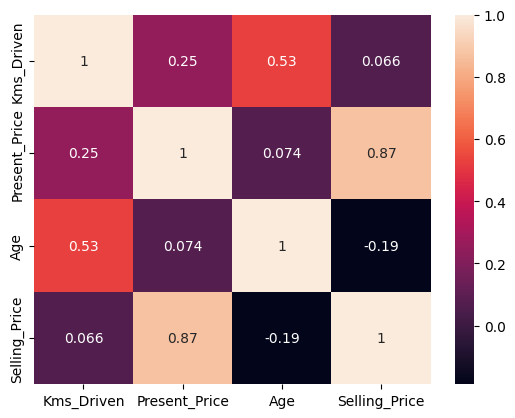

In [18]:
# heatmap de la matrice de corrélation
sns.heatmap(quant_data.corr(), annot = True)

In [19]:
# boxplots des variables quantitatives
for col in quant_data.columns:
    fig = px.box(quant_data[col])
    fig.show()

Preparation des données

In [ ]:
# Gérer les doublons
# df[df.duplicated()]

In [20]:
# Gérer les valeurs abérrantes des variables quantitatives
k = 3 # Dans la littérature k = 1.5 est plus utilisé
for col in quant_data.columns:
  Q1 = df[col].quantile(0.25) # premier quartile
  Q3 = df[col].quantile(0.75) # troisième quartile
  IQR = Q3 - Q1 # l'écart interquartile
  min_value  = Q1 -  k * IQR # valeur minimale
  max_value = Q3 +  k * IQR # valeur maximale
  df = df[(df[col] >= min_value) & (df[col] <= max_value)] # slicing
  df = df.reset_index(drop = True) # reset des index

In [21]:
from sklearn.preprocessing import LabelEncoder
# Encoder les variables catégorielles
for col in cat_data.columns:
    df[col]= LabelEncoder().fit_transform(df[col])

df.head()

,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Transmission,Age,Selling_Price
0,27000,5.59,2,0,1,6,3.35
1,43000,9.54,1,0,1,7,4.75
2,6900,9.85,2,0,1,3,7.25
3,5200,4.15,2,0,1,9,2.85
4,42450,6.87,1,0,1,6,4.60


In [22]:
# Fractionner les données en variables prédicteurs (x) et variable cibel(y)
x = df.drop('Selling_Price', axis = 1).values
y = df.Selling_Price.values

In [23]:
# normaliser les données
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [24]:
# splitter les données en train, val et test
from sklearn.model_selection import train_test_split
x_train, x_vt, y_train,y_vt = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_val, x_test, y_val,y_test = train_test_split(x_vt,y_vt, test_size = 0.5, random_state = 42)

Multiple Linear Regression

Recherche des paramètres optimaux

In [25]:
# Rechercher les paramètres optimaux de l'algorithme
from sklearn.model_selection import GridSearchCV
# Importer Linear Regression
from sklearn.linear_model import LinearRegression
# dictionnaire params
params = {'fit_intercept': [True,False],
               'positive': [True,False]}
# Initialisation du modèle
lr = LinearRegression()
# Initialisation du GridSearchCV
grid = GridSearchCV(lr, params, cv = 5)
# Lancer la recherche
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [26]:
# best params
grid.best_params_

{'fit_intercept': True, 'positive': False}

Entrainement du modèle

In [27]:
# Importer Linear Regression
lr = LinearRegression(fit_intercept = True, positive =False)
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
# Afficher les coefs des variables
fig = px.bar(x=lr.coef_, y = df.columns[:-1])
fig.show()

Evaluation du modèle

In [29]:
# importer les métriques
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lr.predict(x_val)
# Afficher les métriques
# print('{0:20}{1:20}'.format('R2 score', 'Mean squarred Error'))
# print('{0:5}{1:25}'.format(round(r2_score(y_pred, y_val),2), round(mean_squared_error(y_pred, y_val), 2)))
print('R2 score : ', round(r2_score(y_pred, y_val),2), '---', ' Mean squarred error : ', round(mean_squared_error(y_pred, y_val), 2))

R2 score :  0.76 ---  Mean squarred error :  3.94


In [30]:
# Calculer le R2 score sur les données d'entrainement
y_pred_train = lr.predict(x_train)
# Afficher les métriques
print('R2 score : ', round(r2_score(y_pred_train, y_train),2), '---', ' Mean squarred error : ', round(mean_squared_error(y_pred_train, y_train), 2))

R2 score :  0.77 ---  Mean squarred error :  4.14


In [31]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [32]:
import gradio as gr

In [34]:
import gradio as gr

def calculate_selling_price(kms_Driven, Present_Price, Fuel_Type, Seller_Type, Transmission, Age):
    base_price = Present_Price * 0.8  
    if Fuel_Type == "Diesel":
        base_price += 500
    if Seller_Type == "Individual":
        base_price -= 1000
    if Transmission == "Automatic":
        base_price += 2000
    adjusted_price = base_price - (kms_Driven * 0.02) - (age * 500)
    return max(adjusted_price, 0)  # Retourne une valeur positive minimale de 0

iface = gr.Interface(
    fn=calculate_selling_price,
    inputs=[
        gr.Number(label="Kilometers_Driven"),
        gr.Number(label="Present_Price (in $)"),
        gr.Dropdown(["Diesel", "Petrol", "Electric"], label="Fuel_Type"),
        gr.Dropdown(["Dealer", "Individual"], label="Seller_Type"),
        gr.Dropdown(["Manual", "Automatic"], label="Transmission"),
        gr.Number(label="Age de la voiture (en annee)"),
    ],
    outputs="number",
    title="Estimation du prix de vente d'une voiture",
    description="Remplissez les détails pour estimer le prix de vente de la voiture."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://96acfe3dbf06e9d73d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
